# Project Notes 1

In [1]:
## Importing basic and neccessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Problem Understanding

* a) Defining problem statement

A FMCG company which is two years old has been doing instant noodles business in several geographical locations. In an analysis it is found that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. 
In both the cases it is an inventory cost loss to the company. hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.


* b) Need of the study/project 

Due to variation in supply quantity, there is a case where an overloading of a Warehouse where there is low demand leading to oversupply. And vice versa where there is a case of underloading of supplies to warehouse leading undersupply.
From the current data we need to understand the Warehouses which have oversupplied & undersupplied and to build a model based on the data, which can optimize supply quantity to the warehouse.


* c) Understanding business/social opportunity

Business understanding of the project is to increase the number of distributors between warehouse & the retail shops with a minimal effort, while keeping the product weight optimized which is being shipped to the warehouse.
The social opportunity is to acquire more clients and generating more revenue by keeping product weight optimized with the help of ML Models that are generated.


Refer Buisness Report

# 2. Data Report

* a) Understanding how data was collected in terms of time, frequency and methodology 

There is no description observed in problem statement where it clearly defines the timeline which the data has been collected or the frequency of collection of data or the methodology used to collect data.

In [3]:
# Reading the data from csv with full column display
df = pd.read_csv('Data.csv')
pd.set_option('display.max_columns', None)

df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


**b) Visual inspection of data (rows, columns, descriptive details)**

### Rows & Columns

In [4]:
print('The number of Rows in dataset    : ',df.shape[0])
print('The number of Columns in dataset : ',df.shape[1])

The number of Rows in dataset    :  25000
The number of Columns in dataset :  24


### Summary Statistics (Describe)

In [5]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.09,2.61,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.77,1.20,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.10,1.14,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.71,1052.83,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.42,16.06,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.10,0.30,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.05,0.23,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.66,0.47,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.54,62.72,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.94,7.87,10.0,24.0,28.0,33.0,98.0


**c) Understanding of attributes (variable info, renaming if required)**

### Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### Duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
lst = ['Location_type','WH_capacity_size', 'zone', 'WH_regional_zone','num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num','flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year','storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m','govt_check_l3m', 'product_wg_ton']

In [9]:
len(lst)

22

In [10]:
columns=lst
for i in columns:
    zz = round(df.groupby(i)['product_wg_ton'].agg(['count','sum','mean']),2)
    zz['count_%'] = round(zz['count']/sum(zz['count'])*100,2)
    zz['sum_%'] = round(zz['sum']/sum(zz['sum'])*100,2)
    zz['mean_%'] = round(zz['mean']/sum(zz['mean'])*100,2)
    print(i)
    print(display(zz))
    print('\n')

Location_type


,count,sum,mean,count_%,sum_%,mean_%
Location_type,,,,,,
Rural,22957,501482582,21844.43,91.83,90.76,46.63
Urban,2043,51083241,25004.03,8.17,9.24,53.37


None


WH_capacity_size


,count,sum,mean,count_%,sum_%,mean_%
WH_capacity_size,,,,,,
Large,10169,224739861,22100.49,40.68,40.67,33.38
Mid,10020,222467027,22202.30,40.08,40.26,33.54
Small,4811,105358935,21899.59,19.24,19.07,33.08


None


zone


,count,sum,mean,count_%,sum_%,mean_%
zone,,,,,,
East,429,9747503,22721.45,1.72,1.76,25.55
North,10278,228165823,22199.44,41.11,41.29,24.96
South,6362,139540901,21933.50,25.45,25.25,24.66
West,7931,175111596,22079.38,31.72,31.69,24.83


None


WH_regional_zone


,count,sum,mean,count_%,sum_%,mean_%
WH_regional_zone,,,,,,
Zone 1,2054,44659532,21742.71,8.22,8.08,16.41
Zone 2,2963,66580768,22470.73,11.85,12.05,16.96
Zone 3,2881,63290230,21968.15,11.52,11.45,16.58
Zone 4,4176,92596029,22173.38,16.70,16.76,16.74
Zone 5,4587,101017613,22022.59,18.35,18.28,16.62
Zone 6,8339,184421651,22115.56,33.36,33.38,16.69


None


num_refill_req_l3m


,count,sum,mean,count_%,sum_%,mean_%
num_refill_req_l3m,,,,,,
0,2912,63961882,21964.93,11.65,11.58,11.05
1,2856,63041514,22073.36,11.42,11.41,11.11
2,1808,38927080,21530.46,7.23,7.04,10.84
3,2990,67532196,22586.02,11.96,12.22,11.37
4,2846,63200638,22206.83,11.38,11.44,11.18
5,2941,65093259,22133.04,11.76,11.78,11.14
6,2804,61848370,22057.19,11.22,11.19,11.10
7,2873,64004597,22277.97,11.49,11.58,11.21
8,2970,64956287,21870.80,11.88,11.76,11.01


None


transport_issue_l1y


,count,sum,mean,count_%,sum_%,mean_%
transport_issue_l1y,,,,,,
0,15215,359167349,23606.14,60.86,65.00,20.13
1,4644,99133868,21346.66,18.58,17.94,18.20
2,2198,41450553,18858.30,8.79,7.50,16.08
3,1818,32129593,17673.04,7.27,5.81,15.07
4,777,14896451,19171.75,3.11,2.70,16.35
5,348,5788009,16632.21,1.39,1.05,14.18


None


Competitor_in_mkt


,count,sum,mean,count_%,sum_%,mean_%
Competitor_in_mkt,,,,,,
0,1,16056,16056.00,0.00,0.00,6.36
1,432,9554547,22117.01,1.73,1.73,8.77
2,8669,189918782,21907.81,34.68,34.37,8.68
3,7094,158332256,22319.18,28.38,28.65,8.85
4,6708,147731427,22023.17,26.83,26.74,8.73
5,1265,28273370,22350.49,5.06,5.12,8.86
6,546,12452773,22807.28,2.18,2.25,9.04
7,189,4123378,21816.81,0.76,0.75,8.65
8,76,1730843,22774.25,0.30,0.31,9.03


None


retail_shop_num


,count,sum,mean,count_%,sum_%,mean_%
retail_shop_num,,,,,,
1821,1,24111,24111.0,0.0,0.00,0.02
1871,1,6131,6131.0,0.0,0.00,0.01
1905,1,6106,6106.0,0.0,0.00,0.01
1915,1,35151,35151.0,0.0,0.01,0.03
1953,1,11072,11072.0,0.0,0.00,0.01
...,...,...,...,...,...,...
10224,1,14070,14070.0,0.0,0.00,0.01
10320,1,38132,38132.0,0.0,0.01,0.04
10562,1,25093,25093.0,0.0,0.00,0.02


None


wh_owner_type


,count,sum,mean,count_%,sum_%,mean_%
wh_owner_type,,,,,,
Company Owned,13578,299270114,22040.81,54.31,54.16,49.85
Rented,11422,253295709,22176.13,45.69,45.84,50.15


None


distributor_num


,count,sum,mean,count_%,sum_%,mean_%
distributor_num,,,,,,
15,436,9863034,22621.64,1.74,1.78,1.83
16,431,9382457,21769.04,1.72,1.70,1.76
17,415,9055697,21820.96,1.66,1.64,1.76
18,439,10127880,23070.34,1.76,1.83,1.86
19,416,8911128,21420.98,1.66,1.61,1.73
20,440,9530210,21659.57,1.76,1.72,1.75
21,478,10701762,22388.62,1.91,1.94,1.81
22,460,10042622,21831.79,1.84,1.82,1.76
23,450,9614398,21365.33,1.80,1.74,1.73


None


flood_impacted


,count,sum,mean,count_%,sum_%,mean_%
flood_impacted,,,,,,
0,22546,498524452,22111.44,90.18,90.22,50.1
1,2454,54041371,22021.75,9.82,9.78,49.9


None


flood_proof


,count,sum,mean,count_%,sum_%,mean_%
flood_proof,,,,,,
0,23634,522402742,22103.86,94.54,94.54,50.03
1,1366,30163081,22081.32,5.46,5.46,49.97


None


electric_supply


,count,sum,mean,count_%,sum_%,mean_%
electric_supply,,,,,,
0,8578,189893936,22137.32,34.31,34.37,50.06
1,16422,362671887,22084.51,65.69,65.63,49.94


None


dist_from_hub


,count,sum,mean,count_%,sum_%,mean_%
dist_from_hub,,,,,,
55,104,2380004,22884.65,0.42,0.43,0.48
56,111,2438433,21967.86,0.44,0.44,0.46
57,126,2728811,21657.23,0.50,0.49,0.45
58,122,2671144,21894.62,0.49,0.48,0.46
59,113,2400590,21244.16,0.45,0.43,0.44
...,...,...,...,...,...,...
267,123,2592439,21076.74,0.49,0.47,0.44
268,121,2822257,23324.44,0.48,0.51,0.49
269,125,2654003,21232.02,0.50,0.48,0.44


None


workers_num


,count,sum,mean,count_%,sum_%,mean_%
workers_num,,,,,,
10.0,5,111535,22307.00,0.02,0.02,1.69
11.0,5,78653,15730.60,0.02,0.01,1.19
12.0,15,311616,20774.40,0.06,0.06,1.57
13.0,24,527416,21975.67,0.10,0.10,1.66
14.0,104,2366477,22754.59,0.43,0.45,1.72
15.0,155,3650406,23551.01,0.65,0.69,1.78
16.0,328,7397508,22553.38,1.37,1.39,1.71
17.0,445,10070853,22631.13,1.85,1.90,1.71
18.0,559,12465378,22299.42,2.33,2.35,1.69


None


wh_est_year


,count,sum,mean,count_%,sum_%,mean_%
wh_est_year,,,,,,
1996.0,191,6658690,34862.25,1.46,2.12,5.28
1997.0,329,11471380,34867.42,2.51,3.66,5.28
1998.0,507,17774982,35059.14,3.86,5.67,5.31
1999.0,482,16817764,34891.63,3.67,5.36,5.29
2000.0,551,19412215,35230.88,4.20,6.19,5.34
2001.0,518,18109656,34960.73,3.95,5.77,5.30
2002.0,533,18589675,34877.44,4.06,5.93,5.28
2003.0,469,16084205,34294.68,3.57,5.13,5.20
2004.0,515,17821165,34604.20,3.93,5.68,5.24


None


storage_issue_reported_l3m


,count,sum,mean,count_%,sum_%,mean_%
storage_issue_reported_l3m,,,,,,
0,908,4930869,5430.47,3.63,0.89,0.54
4,1081,5602095,5182.33,4.32,1.01,0.52
5,1351,8645439,6399.29,5.40,1.56,0.64
6,1056,8158616,7725.96,4.22,1.48,0.77
7,491,4393171,8947.40,1.96,0.80,0.89
8,406,4120684,10149.47,1.62,0.75,1.01
9,787,9165459,11646.07,3.15,1.66,1.16
10,637,8259859,12966.81,2.55,1.49,1.29
11,867,12270859,14153.24,3.47,2.22,1.41


None


temp_reg_mach


,count,sum,mean,count_%,sum_%,mean_%
temp_reg_mach,,,,,,
0,17418,371425974,21324.26,69.67,67.22,47.16
1,7582,181139849,23890.77,30.33,32.78,52.84


None


approved_wh_govt_certificate


,count,sum,mean,count_%,sum_%,mean_%
approved_wh_govt_certificate,,,,,,
A,4671,112676348,24122.53,19.39,20.58,21.07
A+,4191,111974920,26717.95,17.40,20.45,23.34
B,4812,102299663,21259.28,19.97,18.68,18.57
B+,4917,105499193,21456.01,20.41,19.26,18.74
C,5501,115184830,20938.89,22.83,21.03,18.29


None


wh_breakdown_l3m


,count,sum,mean,count_%,sum_%,mean_%
wh_breakdown_l3m,,,,,,
0,908,4930869,5430.47,3.63,0.89,3.97
1,2036,23672785,11627.10,8.14,4.28,8.50
2,5076,109370976,21546.69,20.30,19.79,15.74
3,5006,110723620,22118.18,20.02,20.04,16.16
4,4037,103310885,25591.00,16.15,18.70,18.70
5,3925,99024135,25229.08,15.70,17.92,18.44
6,4012,101532553,25307.22,16.05,18.37,18.49


None


govt_check_l3m


,count,sum,mean,count_%,sum_%,mean_%
govt_check_l3m,,,,,,
1,550,12258019,22287.31,2.20,2.22,3.17
2,431,9565090,22192.78,1.72,1.73,3.16
3,438,9740051,22237.56,1.75,1.76,3.16
4,99,2197215,22194.09,0.40,0.40,3.16
5,250,5388430,21553.72,1.00,0.98,3.07
6,1224,27593098,22543.38,4.90,4.99,3.21
7,65,1299843,19997.58,0.26,0.24,2.85
8,276,6111385,22142.70,1.10,1.11,3.15
9,932,20461622,21954.53,3.73,3.70,3.12


None


product_wg_ton


,count,sum,mean,count_%,sum_%,mean_%
product_wg_ton,,,,,,
2065,1,2065,2065.0,0.0,0.00,0.00
2083,1,2083,2083.0,0.0,0.00,0.00
2093,1,2093,2093.0,0.0,0.00,0.00
2103,1,2103,2103.0,0.0,0.00,0.00
2104,1,2104,2104.0,0.0,0.00,0.00
...,...,...,...,...,...,...
55120,1,55120,55120.0,0.0,0.01,0.05
55132,1,55132,55132.0,0.0,0.01,0.05
55144,1,55144,55144.0,0.0,0.01,0.05


None




In [11]:
columns=lst

unq_lst = []
unq = pd.DataFrame(columns = ['attribute','num_unq'])

unq['attribute'] = np.array(lst)
for i in columns:
    unq_lst.append(df[i].nunique())
unq['num_unq'] = np.array(unq_lst)

In [12]:
unq.shape

(22, 2)

In [13]:
unq = unq.sort_values('num_unq', ascending = True)
unq

,attribute,num_unq
0,Location_type,2
17,temp_reg_mach,2
12,electric_supply,2
11,flood_proof,2
8,wh_owner_type,2
10,flood_impacted,2
1,WH_capacity_size,3
2,zone,4
18,approved_wh_govt_certificate,5
3,WH_regional_zone,6


In [14]:
np.array(unq.iloc[14:21]['attribute'])

array(['wh_est_year', 'govt_check_l3m', 'storage_issue_reported_l3m',
       'distributor_num', 'workers_num', 'dist_from_hub',
       'product_wg_ton'], dtype=object)

# 2. Exploratory data analysis

**a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)**

Description of storage_issue_reported_l3m
----------------------------------------------------------------------------
count    25000.000
mean        17.130
std          9.161
min          0.000
25%         10.000
50%         18.000
75%         24.000
max         39.000
Name: storage_issue_reported_l3m, dtype: float64 

Skewness 0.113 

Kurtosis -0.68 

W = 0.98 p_value = 0.0 storage_issue_reported_l3m  P_value < 0.05 is NOT Normal


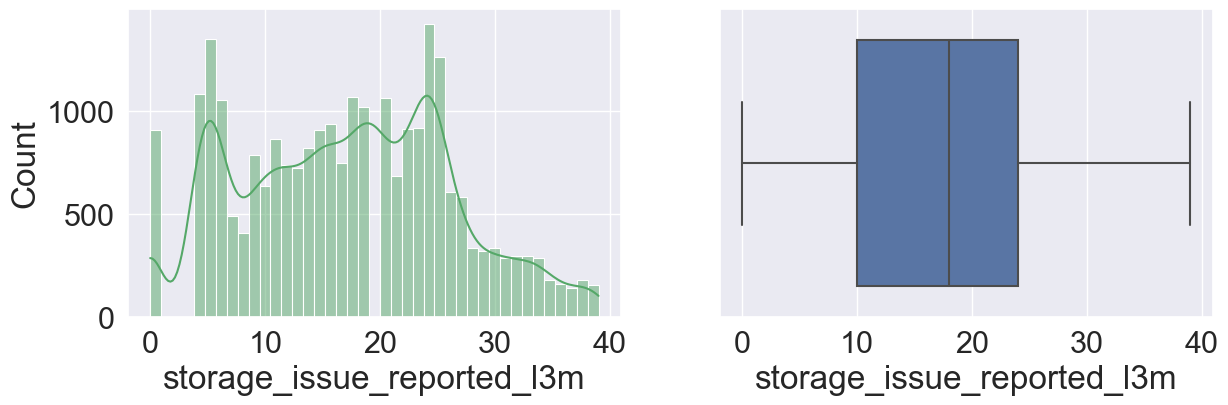

Description of distributor_num
----------------------------------------------------------------------------
count    25000.000
mean        42.418
std         16.064
min         15.000
25%         29.000
50%         42.000
75%         56.000
max         70.000
Name: distributor_num, dtype: float64 

Skewness 0.015 

Kurtosis -1.188 

W = 0.956 p_value = 0.0 distributor_num  P_value < 0.05 is NOT Normal


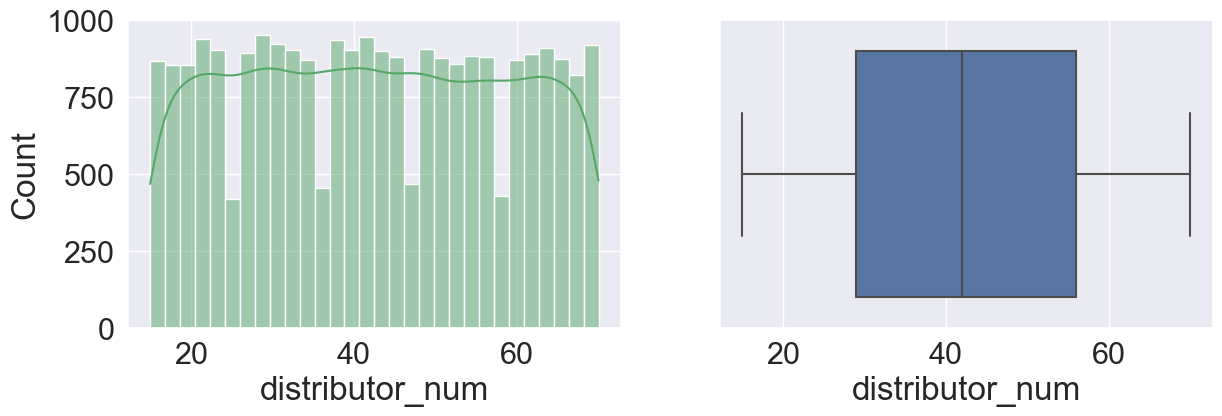

Description of workers_num
----------------------------------------------------------------------------
count    24010.000
mean        28.944
std          7.873
min         10.000
25%         24.000
50%         28.000
75%         33.000
max         98.000
Name: workers_num, dtype: float64 

Skewness 1.06 

Kurtosis 3.409 

W = nan p_value = 1.0 workers_num  P_value > 0.05 is Normal


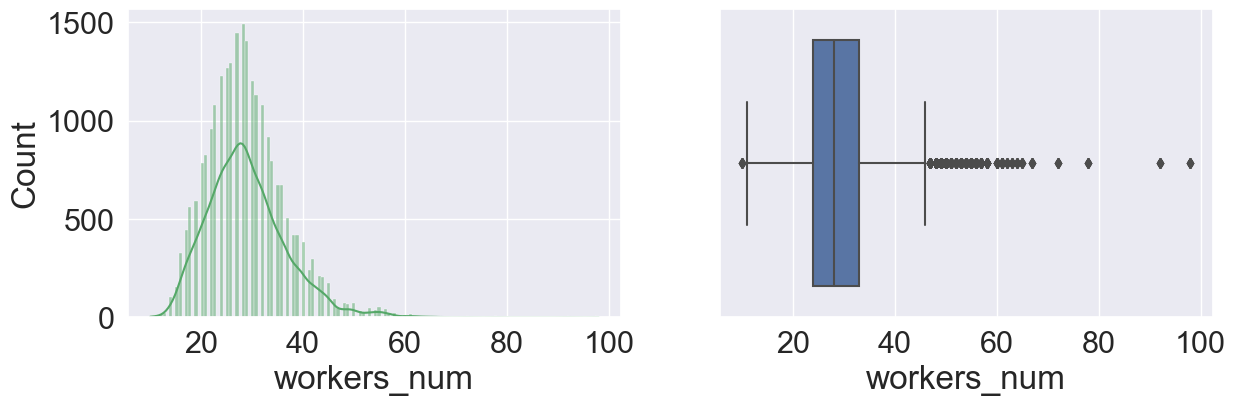

Description of dist_from_hub
----------------------------------------------------------------------------
count    25000.000
mean       163.537
std         62.719
min         55.000
25%        109.000
50%        164.000
75%        218.000
max        271.000
Name: dist_from_hub, dtype: float64 

Skewness -0.006 

Kurtosis -1.201 

W = 0.955 p_value = 0.0 dist_from_hub  P_value < 0.05 is NOT Normal


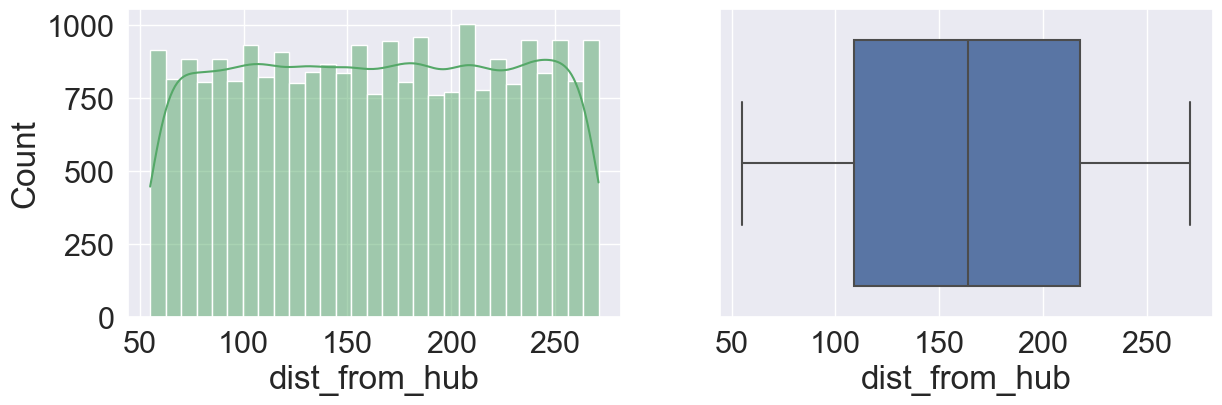

Description of product_wg_ton
----------------------------------------------------------------------------
count    25000.000
mean     22102.633
std      11607.755
min       2065.000
25%      13059.000
50%      22101.000
75%      30103.000
max      55151.000
Name: product_wg_ton, dtype: float64 

Skewness 0.332 

Kurtosis -0.502 

W = 0.971 p_value = 0.0 product_wg_ton  P_value < 0.05 is NOT Normal


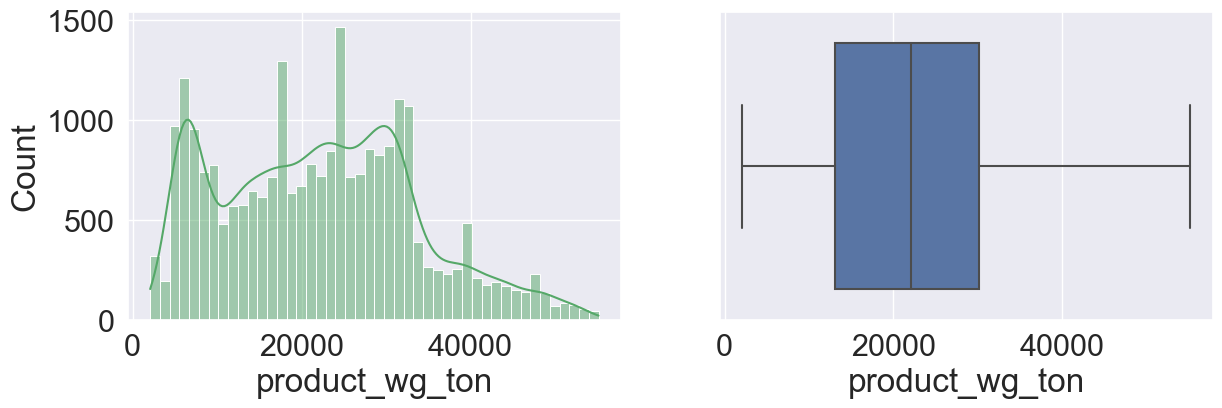

In [101]:
from scipy import stats
lst = ['storage_issue_reported_l3m',
       'distributor_num','workers_num', 'dist_from_hub',
       'product_wg_ton']
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(round(df[column].describe(),3),end=' ')
    print('\n')
    print('Skewness',round(df[column].skew(),3),end=' ')
    print('\n')
    print('Kurtosis',round(df[column].kurtosis(),3),end=' ')
    print('\n')
    w, p_value = stats.shapiro(df[column])
    if p_value>0.05:
        print("W = {}".format(round(w,3)), "p_value = {}".format(round(p_value,3)), x," P_value > 0.05 is Normal")
    else:
        print("W = {}".format(round(w,3)), "p_value = {}".format(round(p_value,3)), x," P_value < 0.05 is NOT Normal")
    
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(14,4)  
    
    sns.histplot(df[column], kde=True, color='g',ax=axes[0]);
    sns.boxplot(x=df[column],ax=axes[1]);
    
    plt.show()
for x in lst:
    univariateAnalysis_numeric(x,10)

**b) Bivariate analysis (relationship between different variables , correlations)**

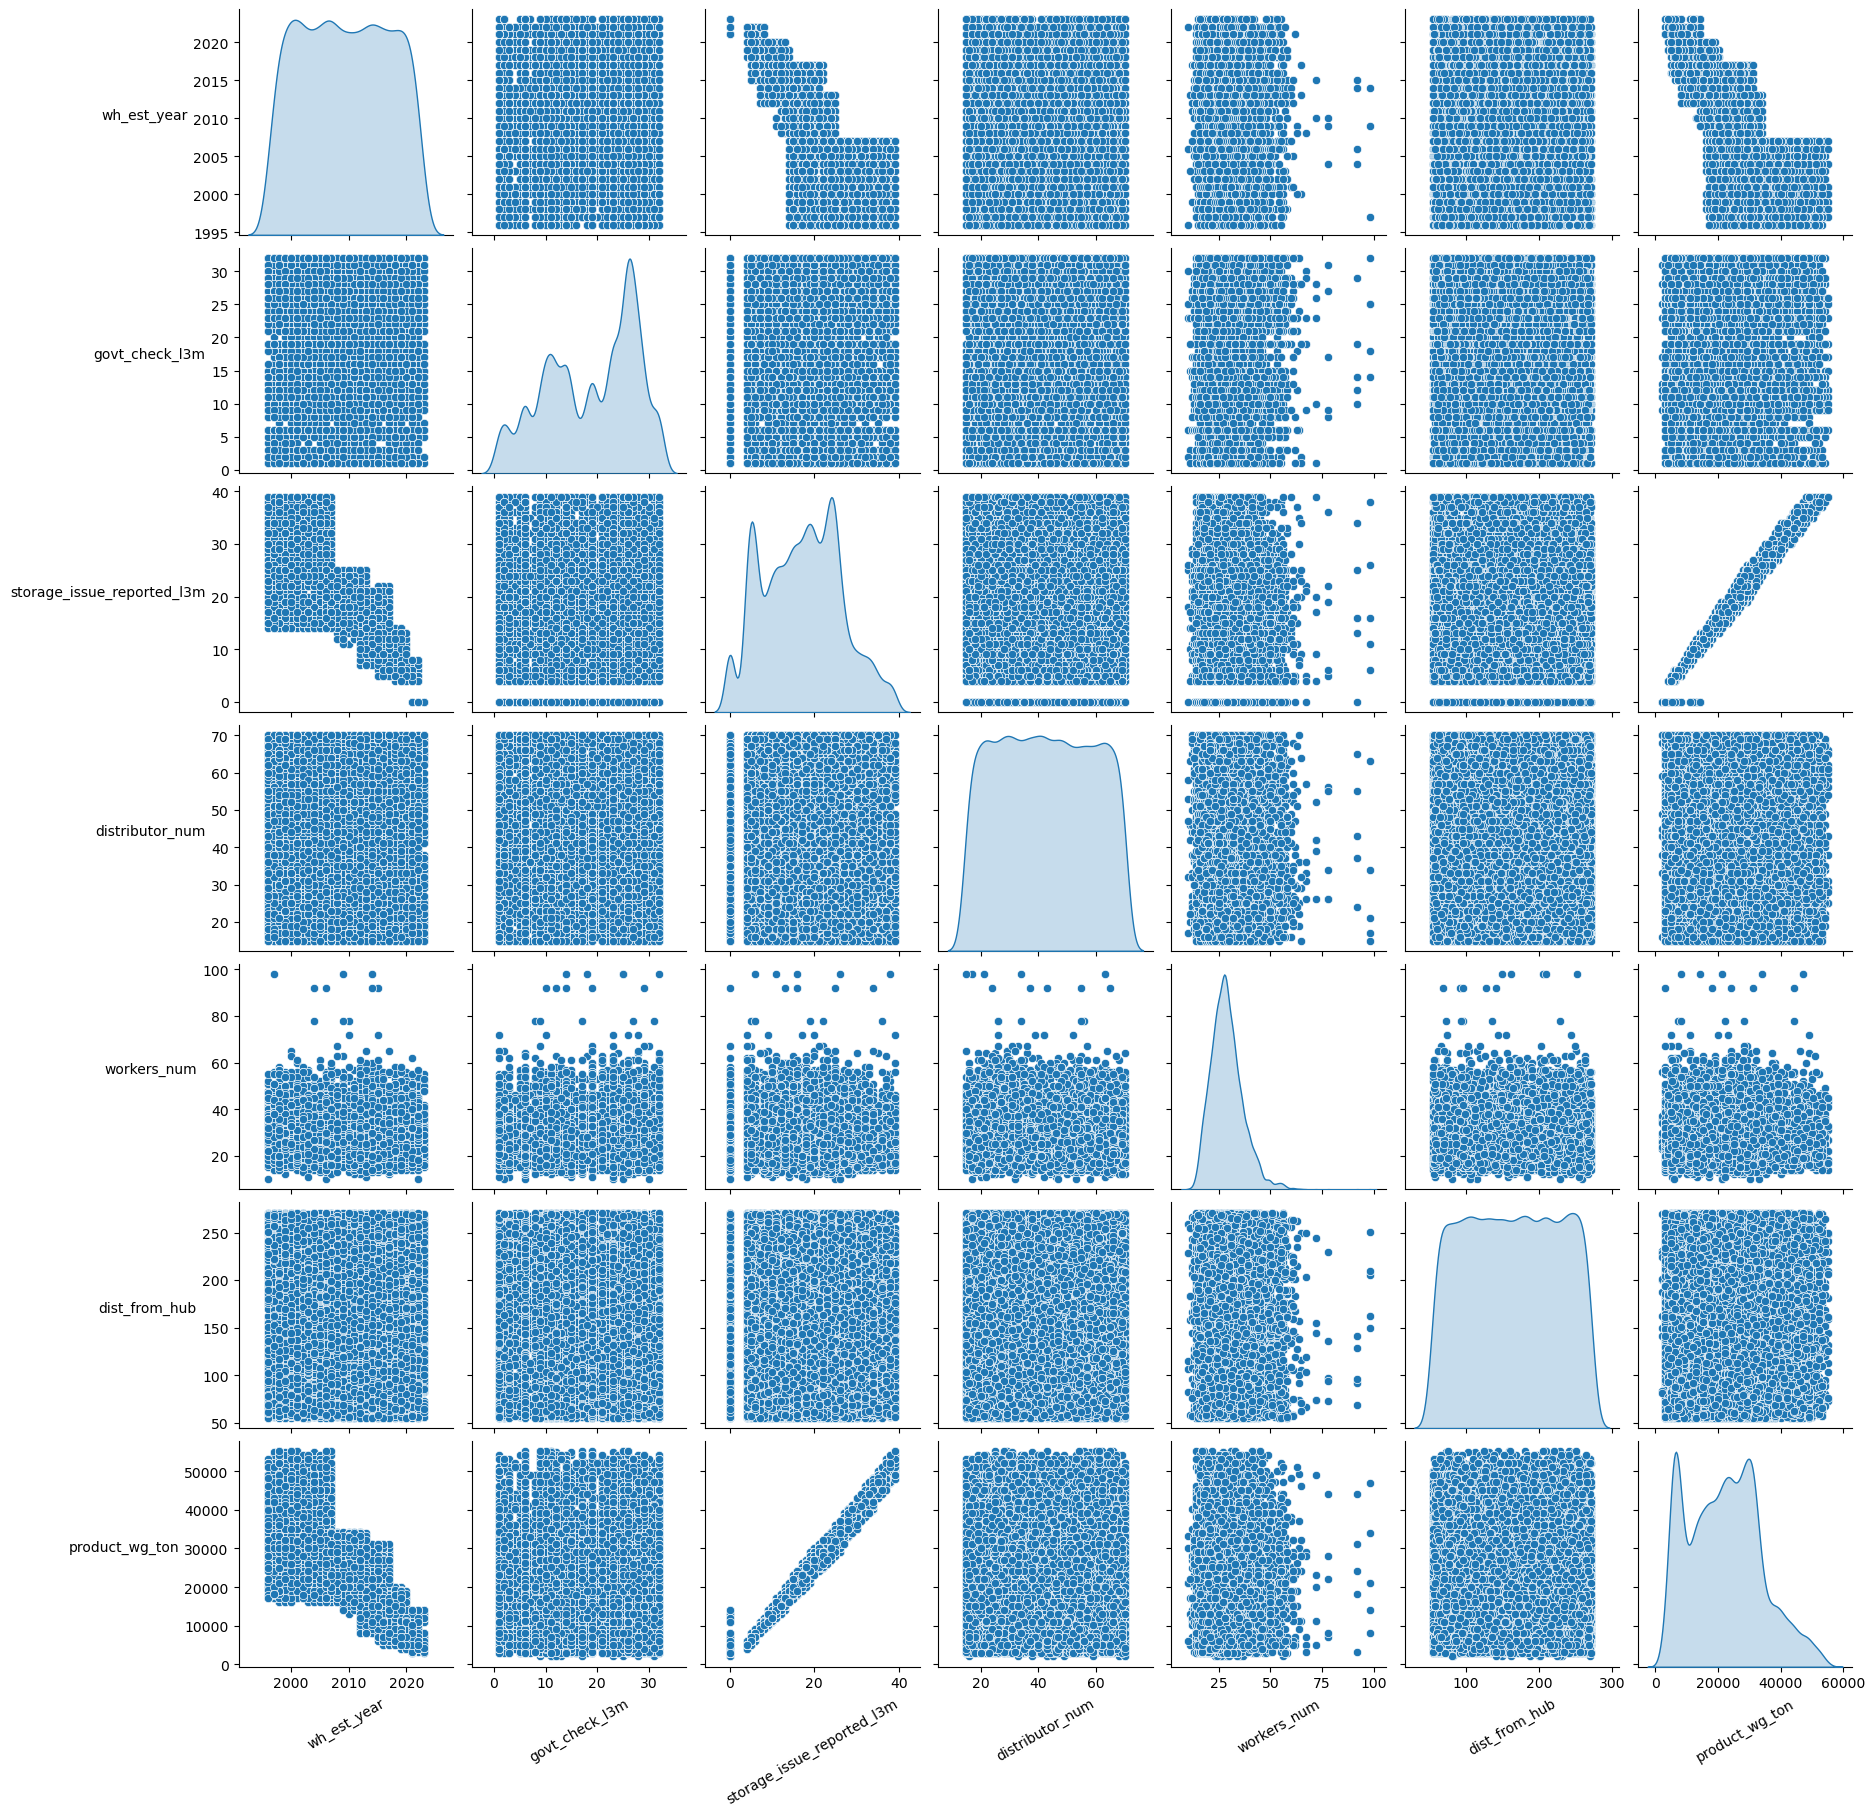

In [16]:
lst = ['wh_est_year', 'govt_check_l3m', 'storage_issue_reported_l3m', 'distributor_num', 'workers_num', 'dist_from_hub',
       'product_wg_ton']
g = sns.pairplot(df[lst], diag_kind="kde")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 30)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

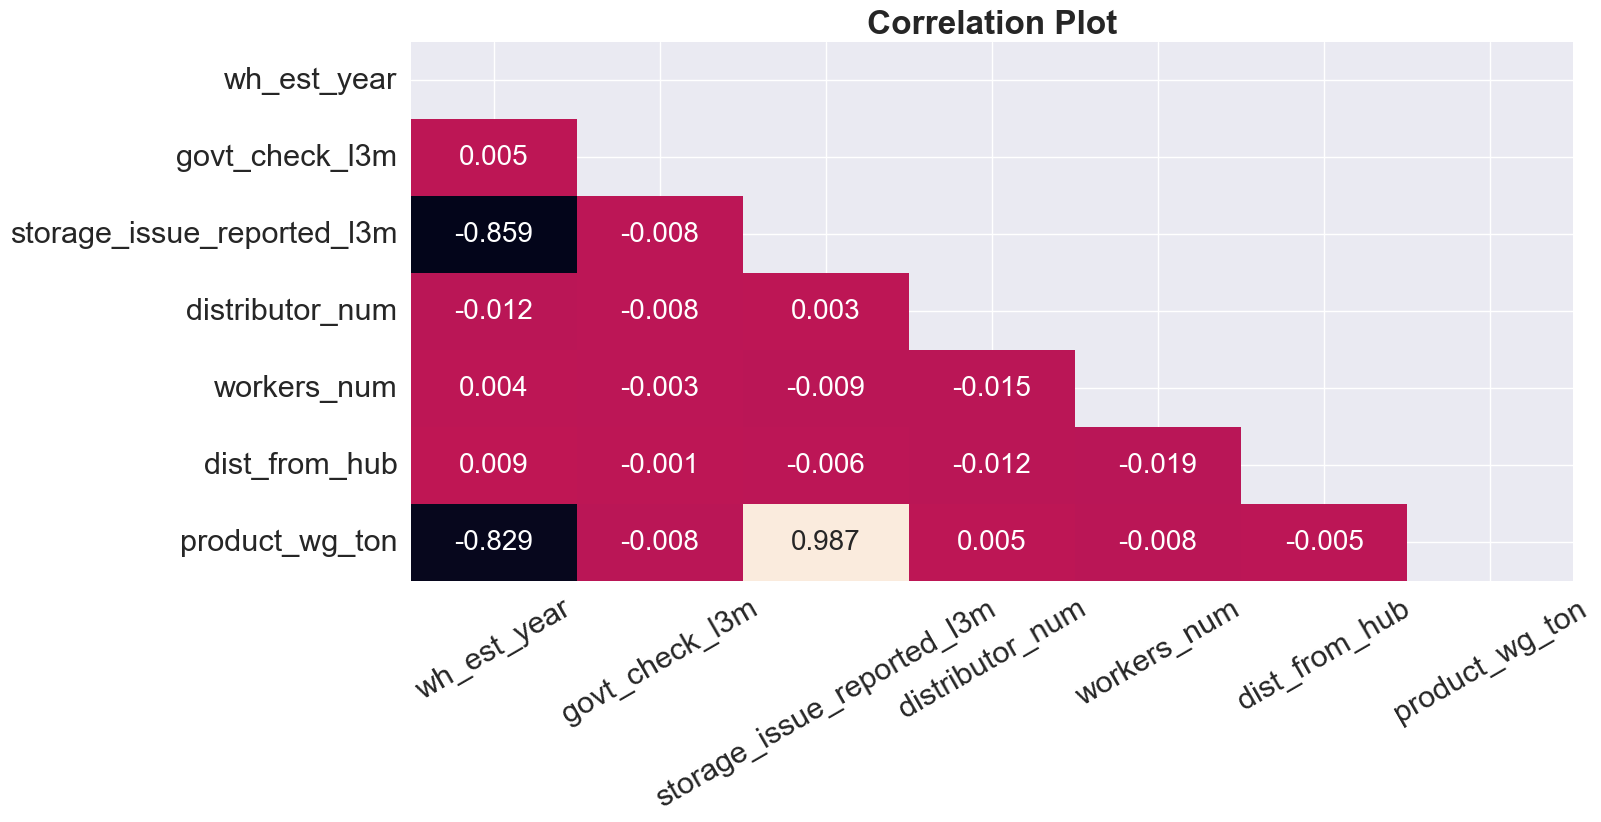

In [124]:
lst = ['wh_est_year', 'govt_check_l3m', 'storage_issue_reported_l3m', 'distributor_num', 'workers_num', 'dist_from_hub',
       'product_wg_ton']

corr = df[lst].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, heat = plt.subplots(figsize = (15,7))
heat = sns.heatmap(df[lst].corr(),annot=True,fmt=".3f", cbar = False,annot_kws={"fontsize":20},mask=mask )
heat.set_title('Correlation Plot',fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plt.xticks(rotation=30,)
plt.yticks(rotation=0)
plt.show()
sns.set(font_scale=2)

<Axes: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

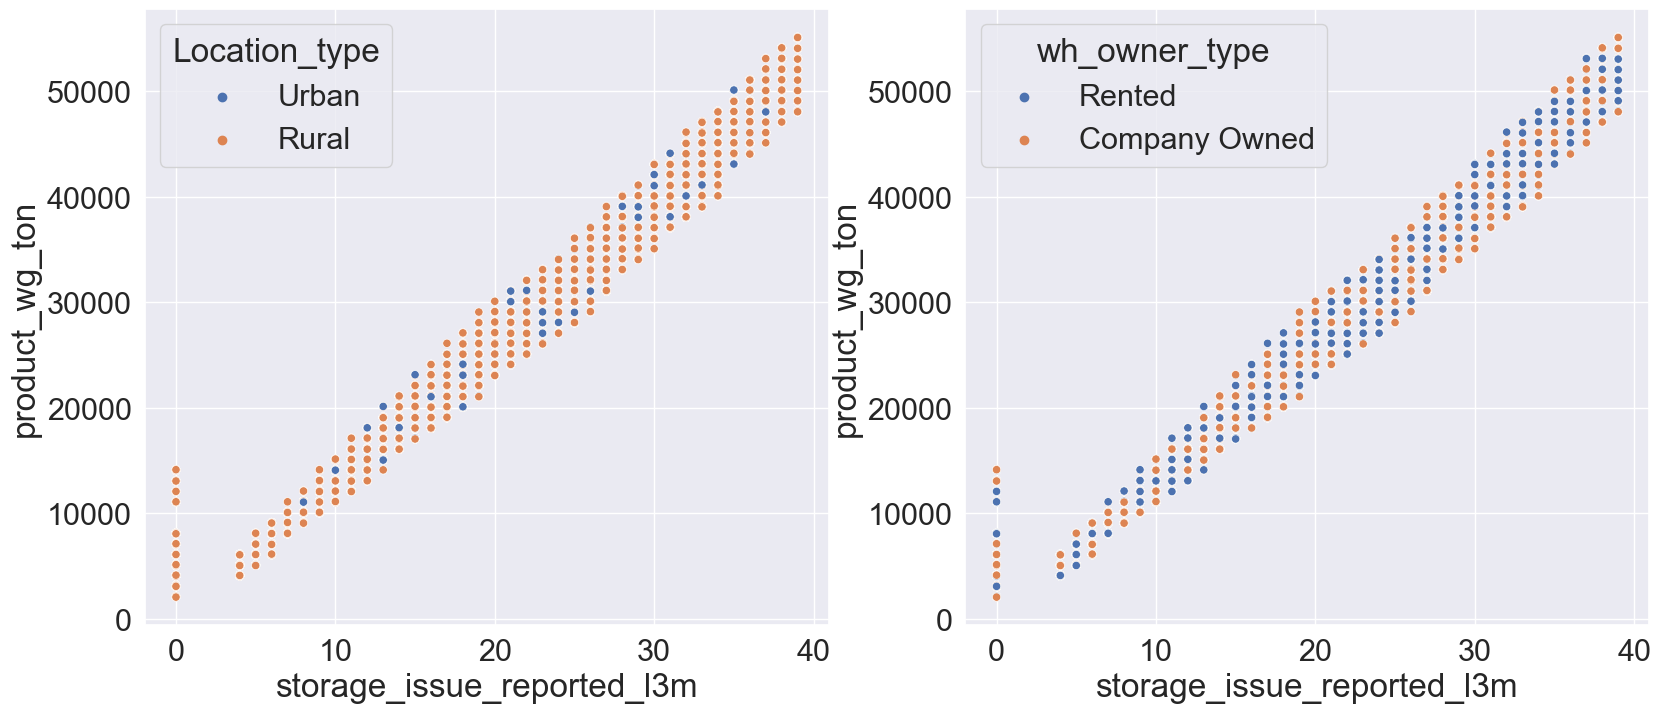

In [18]:
lst = ['Location_type','WH_capacity_size', 'zone', 'WH_regional_zone','num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num','flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year','storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m','govt_check_l3m', 'product_wg_ton']

x = 'storage_issue_reported_l3m'
y = 'product_wg_ton'
order=df[x].value_counts().index
plt.figure(figsize= (30,8))

plt.subplot(1,3,1)
sns.scatterplot(x=df[x], y=df[y], data=df, hue = 'Location_type')


plt.subplot(1,3,2)
sns.scatterplot(x=df[x], y=df[y], data=df, hue = 'wh_owner_type')

**c) Removal of unwanted variables (if applicable)**

In [19]:
lst = ['Location_type','WH_capacity_size', 'zone', 'WH_regional_zone','num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num','flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year','storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m','govt_check_l3m', 'product_wg_ton']

In [20]:
null_vals = pd.DataFrame(df[lst].isnull().sum(), columns = ['nulls'])
null_vals['%_nulls'] = null_vals['nulls']/df.shape[0]*100
null_vals = null_vals.sort_values('nulls', ascending=False)
null_vals.head()

,nulls,%_nulls
wh_est_year,11881,47.524
workers_num,990,3.960
approved_wh_govt_certificate,908,3.632
Location_type,0,0.000
WH_capacity_size,0,0.000


In [21]:
cols = ['Location_type','WH_capacity_size', 'zone', 'WH_regional_zone','num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num','flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m','govt_check_l3m', 'product_wg_ton']

label_cols = ['Location_type','WH_capacity_size', 'zone', 'WH_regional_zone','wh_owner_type']

imp_cols = ['Location_type','WH_capacity_size', 'zone', 'WH_regional_zone','num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num','flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach',
        'wh_breakdown_l3m','govt_check_l3m', 'product_wg_ton']

In [22]:
df_final = df[cols]

In [23]:
df_final.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071


**d) Missing Value treatment (if applicable)**

**e) Outlier treatment (if required)**

**f) Variable transformation (if applicable)**

##### Variable Transformation (Encoding)

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_features = label_cols
for each in categorical_features:
    df_final[each] = encoder.fit_transform(df_final[each])
    
    
df_final.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,18,0,C,6,24,24071


In [25]:
df_final['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [26]:
df_final['approved_wh_govt_certificate'] = np.where(df_final['approved_wh_govt_certificate'] == 'C',0,
                                                  np.where(df_final['approved_wh_govt_certificate'] == 'B',1, 
                                                          np.where(df_final['approved_wh_govt_certificate'] == 'B+',2,
                                                                  np.where(df_final['approved_wh_govt_certificate'] == 'A',3,
                                                                          np.where(df_final['approved_wh_govt_certificate'] == 'A+',4,df_final['approved_wh_govt_certificate'])))))

In [27]:
df_final.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

##### Missing Value Imputation

In [28]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputed = imputer.fit_transform(df_final)
df_final = pd.DataFrame(imputed, columns=cols)

In [29]:
df_final.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [30]:
df_final.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1.0,2.0,3.0,5.0,3.0,1.0,2.0,4651.0,1.0,24.0,0.0,1.0,1.0,91.0,29.0,13.0,0.0,3.0,5.0,15.0,17115.0
1,0.0,0.0,1.0,4.0,0.0,0.0,4.0,6217.0,0.0,47.0,0.0,0.0,1.0,210.0,31.0,4.0,0.0,3.0,3.0,17.0,5074.0
2,0.0,1.0,2.0,1.0,1.0,0.0,4.0,4306.0,0.0,64.0,0.0,0.0,0.0,161.0,37.0,17.0,0.0,3.0,6.0,22.0,23137.0
3,0.0,1.0,1.0,2.0,7.0,4.0,2.0,6000.0,1.0,50.0,0.0,0.0,0.0,103.0,21.0,17.0,1.0,4.0,3.0,27.0,22115.0
4,0.0,0.0,1.0,4.0,3.0,1.0,2.0,4740.0,0.0,42.0,1.0,0.0,1.0,112.0,25.0,18.0,0.0,0.0,6.0,24.0,24071.0


##### Outlier treatment

In perspective business NO bias to be introduced at the beginning stage.
So, therefore No outlier treatment to any attribute at earlier stages.


**g) Addition of new variables (if required)**

In [31]:
df_final.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [32]:
df_final['prdwt_by_distanceFromHub'] = df_final['product_wg_ton']/df_final['dist_from_hub']
df_final['prdwt_by_distributerNum'] = df_final['product_wg_ton']/df_final['distributor_num']
df_final['prdwt_by_workerNum'] = df_final['product_wg_ton']/df_final['workers_num']

In [33]:
df_final.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,prdwt_by_distanceFromHub,prdwt_by_distributerNum,prdwt_by_workerNum
0,1.0,2.0,3.0,5.0,3.0,1.0,2.0,4651.0,1.0,24.0,0.0,1.0,1.0,91.0,29.0,13.0,0.0,3.0,5.0,15.0,17115.0,188.076923,713.125000,590.172414
1,0.0,0.0,1.0,4.0,0.0,0.0,4.0,6217.0,0.0,47.0,0.0,0.0,1.0,210.0,31.0,4.0,0.0,3.0,3.0,17.0,5074.0,24.161905,107.957447,163.677419
2,0.0,1.0,2.0,1.0,1.0,0.0,4.0,4306.0,0.0,64.0,0.0,0.0,0.0,161.0,37.0,17.0,0.0,3.0,6.0,22.0,23137.0,143.708075,361.515625,625.324324
3,0.0,1.0,1.0,2.0,7.0,4.0,2.0,6000.0,1.0,50.0,0.0,0.0,0.0,103.0,21.0,17.0,1.0,4.0,3.0,27.0,22115.0,214.708738,442.300000,1053.095238
4,0.0,0.0,1.0,4.0,3.0,1.0,2.0,4740.0,0.0,42.0,1.0,0.0,1.0,112.0,25.0,18.0,0.0,0.0,6.0,24.0,24071.0,214.919643,573.119048,962.840000


In [34]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_type,25000.0,0.081720,0.273943,0.000000,0.000000,0.000000,0.000000,1.000000
WH_capacity_size,25000.0,0.785680,0.743834,0.000000,0.000000,1.000000,1.000000,2.000000
zone,25000.0,1.871800,0.883513,0.000000,1.000000,2.000000,3.000000,3.000000
WH_regional_zone,25000.0,3.251840,1.668283,0.000000,2.000000,4.000000,5.000000,5.000000
num_refill_req_l3m,25000.0,4.089040,2.606612,0.000000,2.000000,4.000000,6.000000,8.000000
transport_issue_l1y,25000.0,0.773680,1.199449,0.000000,0.000000,0.000000,1.000000,5.000000
Competitor_in_mkt,25000.0,3.104200,1.141663,0.000000,2.000000,3.000000,4.000000,12.000000
retail_shop_num,25000.0,4985.711560,1052.825252,1821.000000,4313.000000,4859.000000,5500.000000,11008.000000
wh_owner_type,25000.0,0.456880,0.498147,0.000000,0.000000,0.000000,1.000000,1.000000
distributor_num,25000.0,42.418120,16.064329,15.000000,29.000000,42.000000,56.000000,70.000000


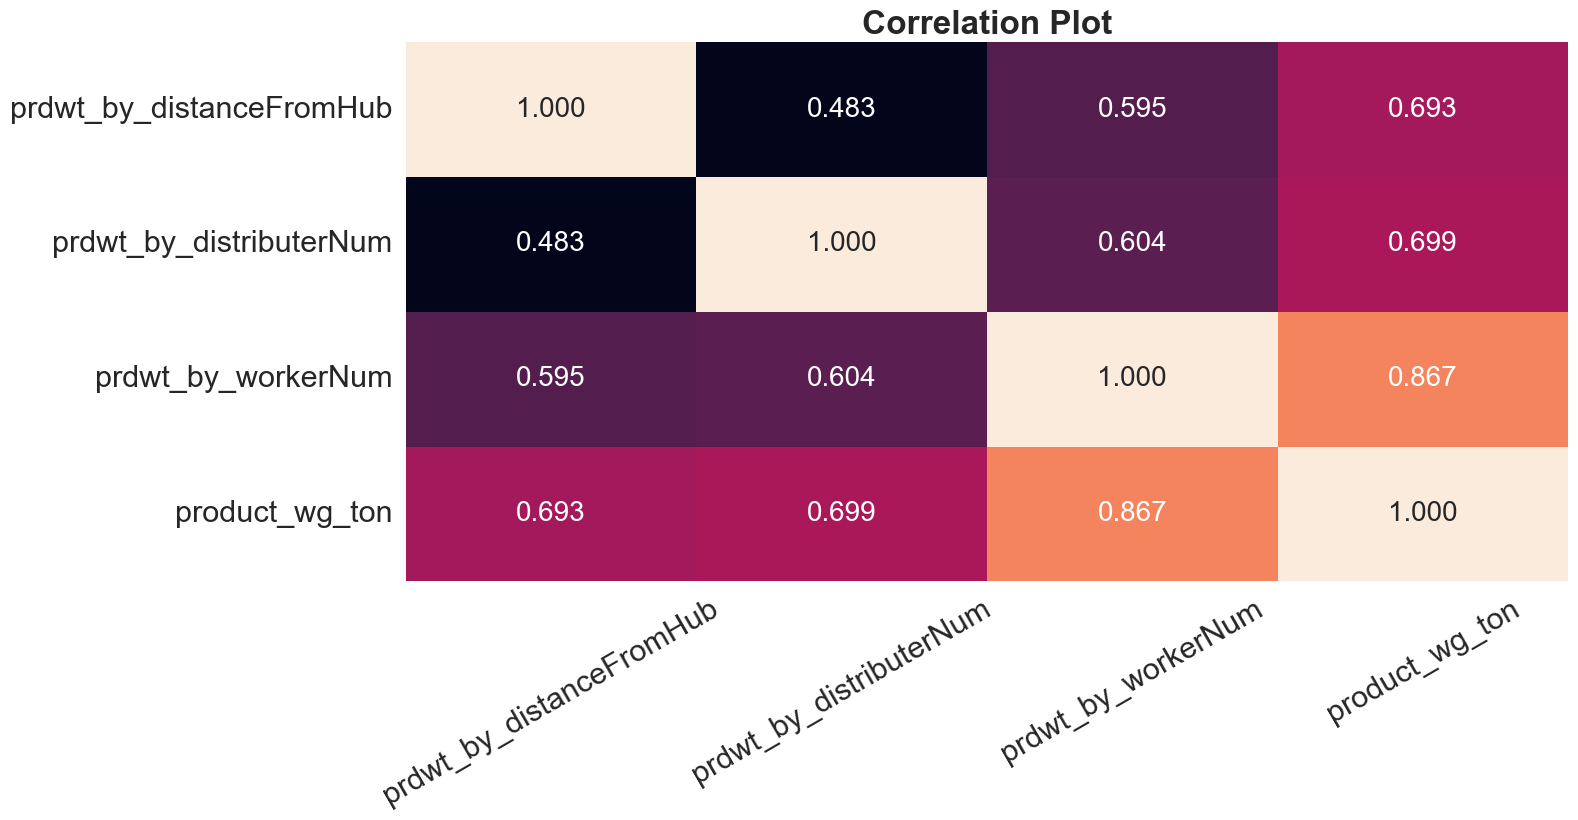

In [35]:
lst = ['prdwt_by_distanceFromHub', 'prdwt_by_distributerNum', 'prdwt_by_workerNum', 'product_wg_ton']
fig, heat = plt.subplots(figsize = (15,7))
heat = sns.heatmap(df_final[lst].corr(),annot=True,fmt=".3f", cbar = False,annot_kws={"fontsize":20} )
heat.set_title('Correlation Plot',fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plt.xticks(rotation=30,)
plt.yticks(rotation=0)
plt.show()
sns.set(font_scale=2)

# 4) Business insights from EDA 

**a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business**

The target variable for the supply chain dataset is product_wg_ton which is a continuous attribute. So, unbalanced data does not apply to this data.

**b) Any business insights using clustering  (if applicable)**

Performing with actual columns of the datset, not with the new variables

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
sc_lst = ['distributor_num',  'num_refill_req_l3m','dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton']
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = pd.DataFrame(X.fit_transform(df_final[sc_lst]),columns=sc_lst)
from sklearn.cluster import KMeans 
wss = []
sill = []
for i in range(2,10):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
    labels = KM.labels_
    sill.append(silhouette_score(scaled_df,labels,random_state=1))


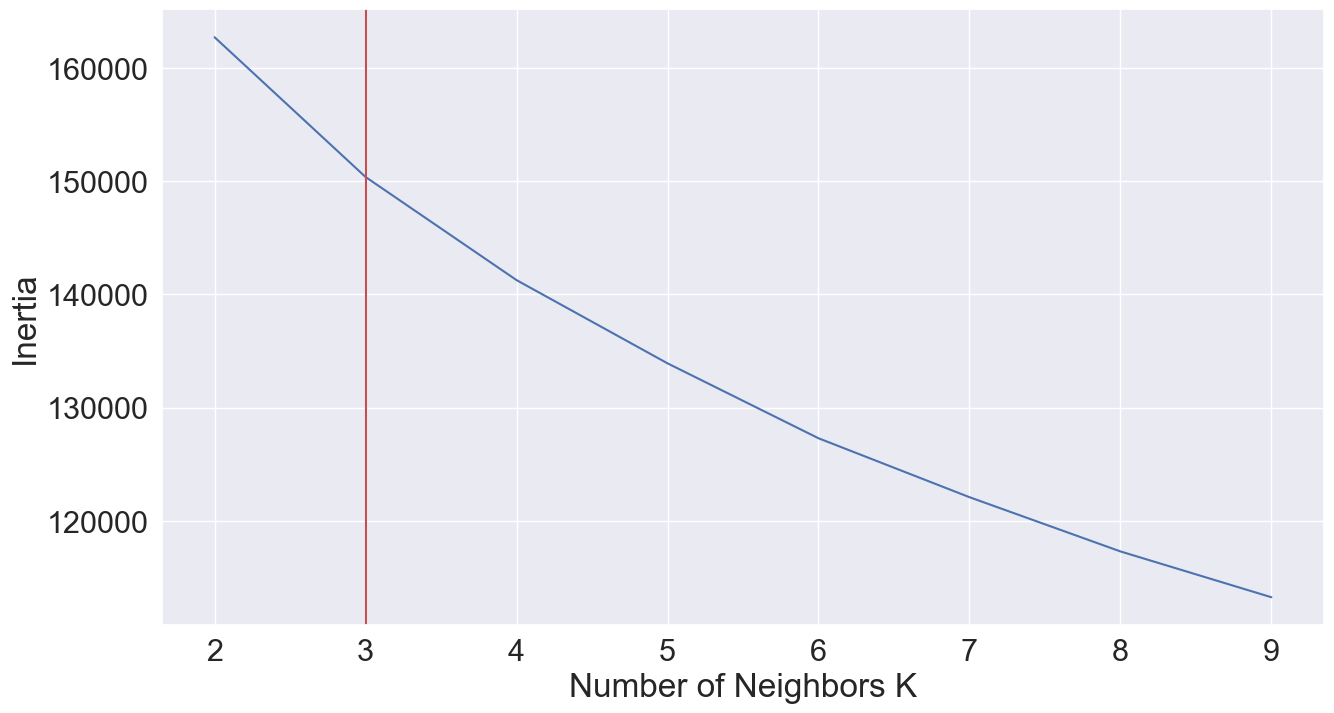

In [37]:
# plot misclassification error vs k
plt.figure(figsize=(15,8))
plt.plot(range(2,10,1), wss)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Inertia')
plt.xticks(range(2,10,1))
plt.axvline(x = 3, color = 'r', label = 'axvline - full height')
plt.show()

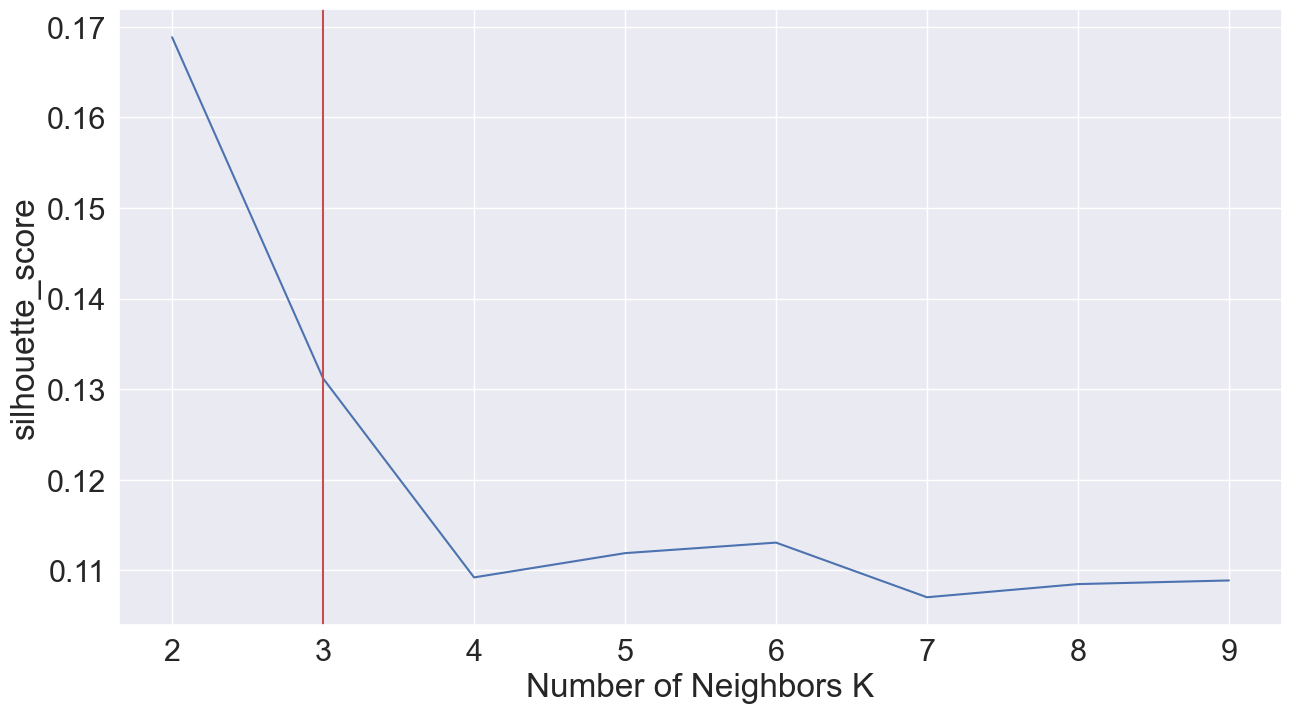

In [38]:
# plot misclassification error vs k
plt.figure(figsize=(15,8))
plt.plot(range(2,10,1), sill)
plt.xlabel('Number of Neighbors K')
plt.ylabel('silhouette_score')
plt.xticks(range(2,10,1))
plt.axvline(x = 3, color = 'r', label = 'axvline - full height')
plt.show()

In [102]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.1688441278487193

In [104]:
df["Clus_kmeans4"] = labels
df["Clus_kmeans4"] = df["Clus_kmeans4"] + 1
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Clus_kmeans4
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115,1
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074,1
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137,2
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115,2
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071,2


In [105]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'Clus_kmeans4'],
      dtype='object')

In [106]:
lst_fin = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'Clus_kmeans4']

In [107]:
df_cluster = df[lst_fin]

In [108]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [109]:
df_num = df_cluster.select_dtypes(['float64','int64','int32'])
df_cat = df_cluster.select_dtypes(['object'])
df_cat['Clus_kmeans4'] = df_num['Clus_kmeans4']
df_cat['Clus_kmeans4'] = df_cat['Clus_kmeans4'].astype('object')

In [110]:
df_num.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Clus_kmeans4'],
      dtype='object')

In [111]:
lst_num = ['transport_issue_l1y', 'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Clus_kmeans4']
round(df_num[lst_num].groupby('Clus_kmeans4').mean(),2)

,transport_issue_l1y,storage_issue_reported_l3m,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
Clus_kmeans4,,,,,
1,0.94,8.72,2.63,18.95,11583.93
2,0.65,23.67,4.14,18.71,30277.86


In [112]:
df_cat.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate', 'Clus_kmeans4'],
      dtype='object')

In [113]:
df_cat.groupby(['Clus_kmeans4']).agg(pd.Series.mode)

,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
Clus_kmeans4,,,,,,
1,Rural,Large,North,Zone 6,Company Owned,C
2,Rural,Mid,North,Zone 6,Company Owned,A


**c) Any other business insights**

Refer business report

# Project Notes 2

# 1. Model building and interpretation.

## a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes) 

## b. Test your predictive model against the test set using various appropriate performance metrics 

## c.Interpretation of the model(s)

# 2. Model Tuning

## a.Ensemble modelling, wherever applicable 
## b. Any other model tuning measures(if applicable) 
## c. Interpretation of the most optimum model and its implication on the business

* df_final is the finalized column for model training & validation
* removing "Retail_shop_num" as I used it for imputation.
    * NEW VARIABLES were not used due to the presence of target variable in them.

In [51]:
df_final.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'prdwt_by_distanceFromHub', 'prdwt_by_distributerNum',
       'prdwt_by_workerNum'],
      dtype='object')

In [52]:
df_fin = df_final.copy()

In [53]:
final_cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt','wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton']

In [54]:
df_fin = df_fin[final_cols]
df_fin.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1.0,2.0,3.0,5.0,3.0,1.0,2.0,1.0,24.0,0.0,1.0,1.0,91.0,29.0,13.0,0.0,3.0,5.0,15.0,17115.0
1,0.0,0.0,1.0,4.0,0.0,0.0,4.0,0.0,47.0,0.0,0.0,1.0,210.0,31.0,4.0,0.0,3.0,3.0,17.0,5074.0
2,0.0,1.0,2.0,1.0,1.0,0.0,4.0,0.0,64.0,0.0,0.0,0.0,161.0,37.0,17.0,0.0,3.0,6.0,22.0,23137.0
3,0.0,1.0,1.0,2.0,7.0,4.0,2.0,1.0,50.0,0.0,0.0,0.0,103.0,21.0,17.0,1.0,4.0,3.0,27.0,22115.0
4,0.0,0.0,1.0,4.0,3.0,1.0,2.0,0.0,42.0,1.0,0.0,1.0,112.0,25.0,18.0,0.0,0.0,6.0,24.0,24071.0


In [55]:
x_cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
        'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
      ]
y_cols =['product_wg_ton']

### Train Test Split

In [56]:
X           = df_fin[x_cols]
y           = df_fin[y_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test        = train_test_split(X, y,test_size=0.30,random_state=1)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train),columns = x_cols)
X_test_sc = pd.DataFrame(sc.fit_transform(X_test),columns = x_cols)

### Multicollinearity Check

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [59]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [round(variance_inflation_factor(X.values, i),3)
                          for i in range(len(X.columns))]
  

vif_data['VIF_Check']=np.where(
                               vif_data['VIF'] == 1,'NO MultiCollinearity',
                               (np.where((vif_data['VIF'] > 1) & (vif_data['VIF'] <= 5),'Moderate MultiCollinearity',
                                         (np.where((vif_data['VIF'] > 5),'Critical MultiCollinearity',0))     ))                          
                               )

vif_data.sort_values('VIF',ascending=False)

,feature,VIF,VIF_Check
13,workers_num,13.964,Critical MultiCollinearity
6,Competitor_in_mkt,7.971,Critical MultiCollinearity
8,distributor_num,7.185,Critical MultiCollinearity
12,dist_from_hub,7.061,Critical MultiCollinearity
17,wh_breakdown_l3m,6.008,Critical MultiCollinearity
3,WH_regional_zone,5.582,Critical MultiCollinearity
2,zone,5.416,Critical MultiCollinearity
14,storage_issue_reported_l3m,5.384,Critical MultiCollinearity
18,govt_check_l3m,5.317,Critical MultiCollinearity
4,num_refill_req_l3m,3.611,Moderate MultiCollinearity


# a)Linear Regression

In [60]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [61]:
lr_final = LinearRegression()
lr_final.fit(X_train,y_train)

LinearRegression()

In [62]:
train_pred = lr_final.predict(X_train)
test_pred = lr_final.predict(X_test)

In [63]:
print('R-Squared (1- SSE/SST) Train data : ',round(r2_score(y_train, train_pred),3))
print('R-Squared (1- SSE/SST) Test data : ',round(r2_score(y_test, test_pred),3))
print('\n')

print('RMSE Train data : ',round(mean_squared_error(y_train, train_pred, squared =False),3))
print('RMSE Test data : ',round(mean_squared_error(y_test, test_pred, squared =False),3))
print('\n')

print('Mean Abs % Error Train data : ',round(mean_absolute_percentage_error(y_train, train_pred)*100,3),"%")
print('Mean Abs % Error Test data : ',round(mean_absolute_percentage_error(y_test,test_pred)*100,3),"%")

R-Squared (1- SSE/SST) Train data :  0.977
R-Squared (1- SSE/SST) Test data :  0.978


RMSE Train data :  1748.132
RMSE Test data :  1692.693


Mean Abs % Error Train data :  8.8 %
Mean Abs % Error Test data :  8.688 %


### Selecting the best Columns 

In [64]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

print(X_train.shape)

sfs1 = SFS(lr_final, k_features=19, forward=True, verbose=2, scoring='r2', n_jobs=-1)
sfs1 = sfs1.fit(X_train, y_train)

df_sfs1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
print(display(df_sfs1.sort_values('avg_score', ascending=False)))

(17500, 19)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:   10.2s remaining:   22.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   10.4s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   10.4s finished

[2023-03-30 10:10:50] Features: 1/19 -- score: 0.9732995622157496[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2023-03-30 10:10:50] Features: 2/19 -- score: 0.9745314602343044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.2s remaining:    0.0s
[Parallel

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 5, 8, 14, 15, 16, 17)","[0.9780134168525796, 0.9764325887047259, 0.976...",0.97742,"(Location_type, transport_issue_l1y, distribut...",0.000948,0.000737,0.000369
8,"(0, 3, 5, 8, 14, 15, 16, 17)","[0.9780012868539397, 0.9764353596201596, 0.976...",0.977419,"(Location_type, WH_regional_zone, transport_is...",0.000944,0.000735,0.000367
6,"(0, 5, 14, 15, 16, 17)","[0.9780112362603297, 0.9764291834725547, 0.976...",0.977418,"(Location_type, transport_issue_l1y, storage_i...",0.000949,0.000738,0.000369
9,"(0, 3, 5, 8, 12, 14, 15, 16, 17)","[0.978005414588277, 0.9764392739067107, 0.9766...",0.977418,"(Location_type, WH_regional_zone, transport_is...",0.000949,0.000738,0.000369
10,"(0, 3, 5, 8, 9, 12, 14, 15, 16, 17)","[0.9780054656380033, 0.9764387741239322, 0.976...",0.977416,"(Location_type, WH_regional_zone, transport_is...",0.000949,0.000739,0.000369
5,"(5, 14, 15, 16, 17)","[0.978003237321936, 0.9764254099101911, 0.9767...",0.977415,"(transport_issue_l1y, storage_issue_reported_l...",0.000945,0.000735,0.000367
11,"(0, 3, 5, 8, 9, 10, 12, 14, 15, 16, 17)","[0.9779941027939222, 0.9764409313225098, 0.976...",0.977414,"(Location_type, WH_regional_zone, transport_is...",0.000946,0.000736,0.000368
12,"(0, 3, 4, 5, 8, 9, 10, 12, 14, 15, 16, 17)","[0.9779766124522223, 0.9764431767599585, 0.976...",0.977412,"(Location_type, WH_regional_zone, num_refill_r...",0.000941,0.000732,0.000366
13,"(0, 3, 4, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17)","[0.9779729694368972, 0.9764370449285744, 0.976...",0.977409,"(Location_type, WH_regional_zone, num_refill_r...",0.000942,0.000733,0.000367
14,"(0, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17)","[0.97797125671723, 0.9764272239862222, 0.97669...",0.977406,"(Location_type, WH_regional_zone, num_refill_r...",0.000945,0.000735,0.000368


None


* storage_issue_reported_l3m is the most important with 97%

### Feature Importances by Coefficients

In [65]:
coeff = pd.DataFrame(columns =[['col_num','atrr','coeff_mag']])
coeff

,col_num,atrr,coeff_mag


In [66]:
col_num = []
atrr = []
coeff_mag = []
for idx, col_name in enumerate(x_cols):
    #print("The coefficient for {} {} is {}".format(idx+1,col_name, round(lr_final.coef_[0][idx],3)))
    #coeff.loc[len(coeff.index)] = [idx+1,col_name, round(lr_final.coef_[0][idx],3)]
    col_num.append(idx+1)
    atrr.append(col_name)
    coeff_mag.append(round(lr_final.coef_[0][idx],3))
    

In [67]:
coeff['col_num'] = np.array(col_num)
coeff['atrr'] = np.array(atrr)
coeff['coeff_mag'] = np.array(coeff_mag)
coeff['coeff_abs'] = coeff['coeff_mag'].abs()

coeff['coeff_%'] = round(coeff['coeff_abs']/(np.sum(coeff['coeff_abs']))*100,2)
coeff.columns = ['col_num','atrr','coeff_mag','coeff_abs','coeff_%']
coeff= coeff.sort_values('coeff_%',ascending=False)

In [68]:
coeff.head()

,col_num,atrr,coeff_mag,coeff_abs,coeff_%
14,15,storage_issue_reported_l3m,1253.259,1253.259,41.72
15,16,temp_reg_mach,736.869,736.869,24.53
5,6,transport_issue_l1y,-312.236,312.236,10.39
16,17,approved_wh_govt_certificate,246.818,246.818,8.22
17,18,wh_breakdown_l3m,-243.695,243.695,8.11


In [69]:
for idx, col_name in enumerate(x_cols):
    print("{} * {}".format(col_name, round(lr_final.coef_[0][idx],3)),end='  +  ')

Location_type * -105.89  +  WH_capacity_size * 8.842  +  zone * -2.508  +  WH_regional_zone * -7.125  +  num_refill_req_l3m * 4.342  +  transport_issue_l1y * -312.236  +  Competitor_in_mkt * -5.243  +  wh_owner_type * 10.074  +  distributor_num * 1.272  +  flood_impacted * 8.325  +  flood_proof * 48.796  +  electric_supply * 8.443  +  dist_from_hub * 0.235  +  workers_num * 0.152  +  storage_issue_reported_l3m * 1253.259  +  temp_reg_mach * 736.869  +  approved_wh_govt_certificate * 246.818  +  wh_breakdown_l3m * -243.695  +  govt_check_l3m * -0.002  +  

### Feature Importances by SHAP Values

Permutation explainer: 17501it [08:28, 34.08it/s]                                                                      


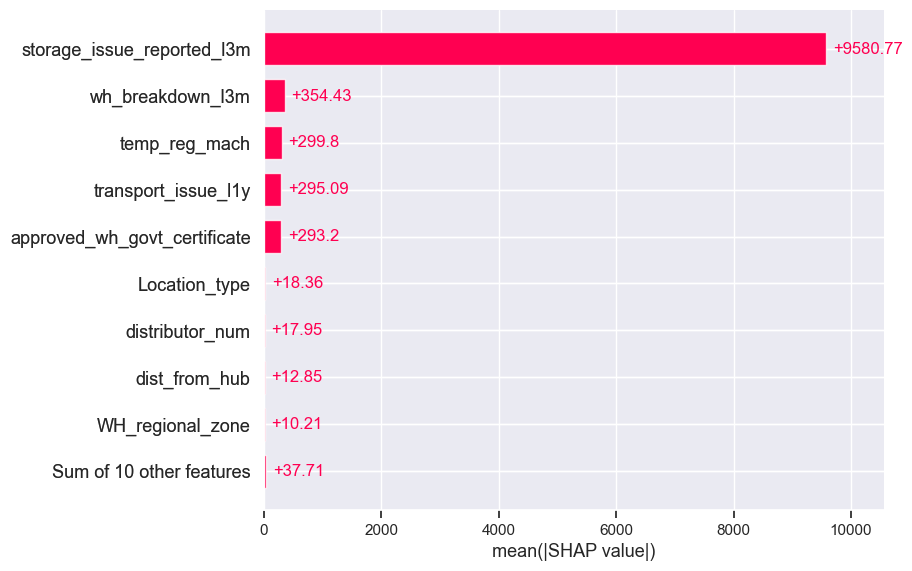

In [70]:
import shap
# Fits the explainer
explainer_train_lr = shap.Explainer(lr_final.predict, X_train)

# Calculates the SHAP values - It takes some time
shap_values_train_lr = explainer_train_lr(X_train)
shap.plots.bar(shap_values_train_lr)

Permutation explainer: 7501it [03:53, 30.69it/s]                                                                       


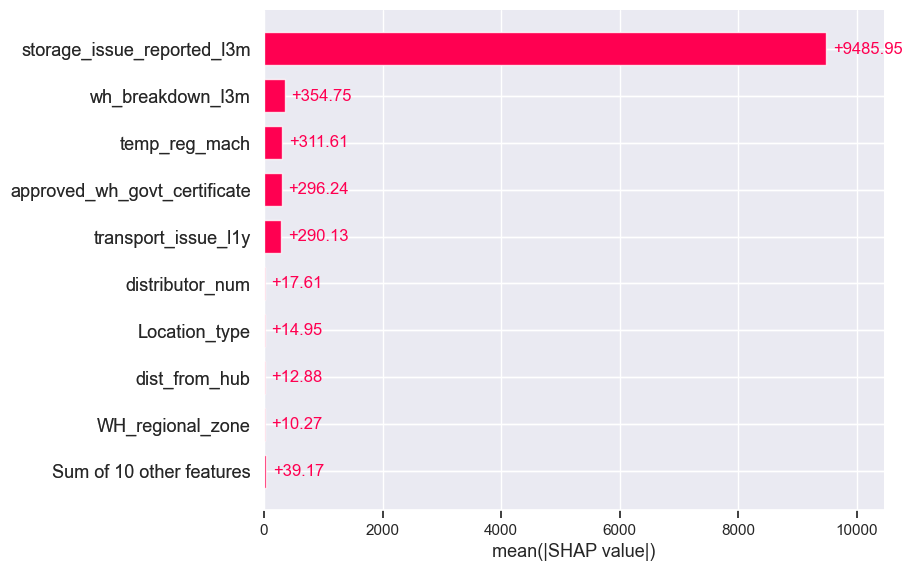

In [71]:
# Fits the explainer
explainer_test_lr = shap.Explainer(lr_final.predict, X_test)

# Calculates the SHAP values - It takes some time
shap_values_test_lr = explainer_test_lr(X_test)
shap.plots.bar(shap_values_test_lr)

# b) RandomForest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {
    'n_estimators'      : [100],
    "max_features"      : ["auto"],
    'max_depth'         : [9],
    'min_samples_split' : [3],
    'min_samples_leaf'  : [3],
    'criterion'         : ['squared_error']
}

In [74]:
mdl_rfg = RandomForestRegressor(random_state = 1)
model_rfg = GridSearchCV(mdl_rfg, parameters, n_jobs=-1, 
                   cv=5, 
                   scoring='neg_root_mean_squared_error',
                   verbose=2, refit=True)
model_rfg.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [9],
                         'max_features': ['auto'], 'min_samples_leaf': [3],
                         'min_samples_split': [3], 'n_estimators': [100]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [75]:
print(model_rfg.best_params_,'\n')
print(model_rfg.best_estimator_)

{'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100} 

RandomForestRegressor(max_depth=9, max_features='auto', min_samples_leaf=3,
                      min_samples_split=3, random_state=1)


In [76]:
best_model_rfg = model_rfg.best_estimator_
train_pred = best_model_rfg.predict(X_train)
test_pred = best_model_rfg.predict(X_test)

In [77]:
print('R-Squared (1- SSE/SST) Train data : ',round(r2_score(y_train, train_pred),3))
print('R-Squared (1- SSE/SST) Test data : ',round(r2_score(y_test, test_pred),3))
print('\n')

print('RMSE Train data : ',round(mean_squared_error(y_train, train_pred, squared =False),3))
print('RMSE Test data : ',round(mean_squared_error(y_test, test_pred, squared =False),3))
print('\n')

print('Mean Abs % Error Train data : ',round(mean_absolute_percentage_error(y_train, train_pred)*100,3),"%")
print('Mean Abs % Error Test data : ',round(mean_absolute_percentage_error(y_test,test_pred)*100,3),"%")

R-Squared (1- SSE/SST) Train data :  0.995
R-Squared (1- SSE/SST) Test data :  0.994


RMSE Train data :  852.301
RMSE Test data :  893.355


Mean Abs % Error Train data :  3.995 %
Mean Abs % Error Test data :  4.22 %


### Feature Importances by Coefficients

In [78]:
# get importance   
feature_scores = pd.Series(best_model_rfg.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores = feature_scores.reset_index()
feature_scores.columns = ['Attribute', 'importance']
feature_scores['importance_%'] = round(feature_scores['importance']*100,3)
feature_scores


,Attribute,importance,importance_%
0,storage_issue_reported_l3m,0.987906,98.791
1,approved_wh_govt_certificate,0.009425,0.942
2,transport_issue_l1y,0.000903,0.090
3,temp_reg_mach,0.000731,0.073
4,num_refill_req_l3m,0.000252,0.025
5,wh_breakdown_l3m,0.000192,0.019
6,dist_from_hub,0.000120,0.012
7,distributor_num,0.000112,0.011
8,govt_check_l3m,0.000094,0.009
9,workers_num,0.000091,0.009


### Feature Importances by SHAP Values

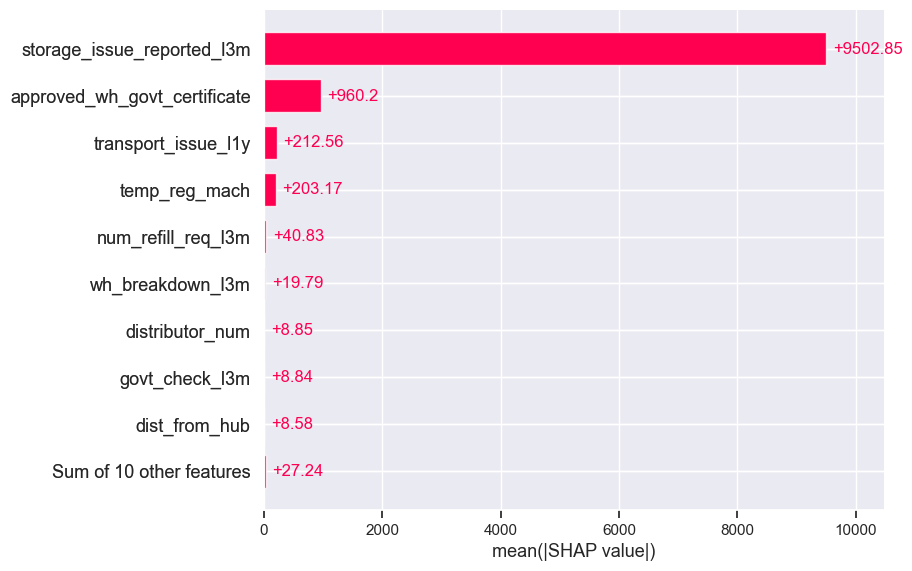

In [79]:
explainer_train_rfg = shap.Explainer(best_model_rfg)
shap_values_train_rfg = explainer_train_rfg(X_train)
shap.plots.bar(shap_values_train_rfg)

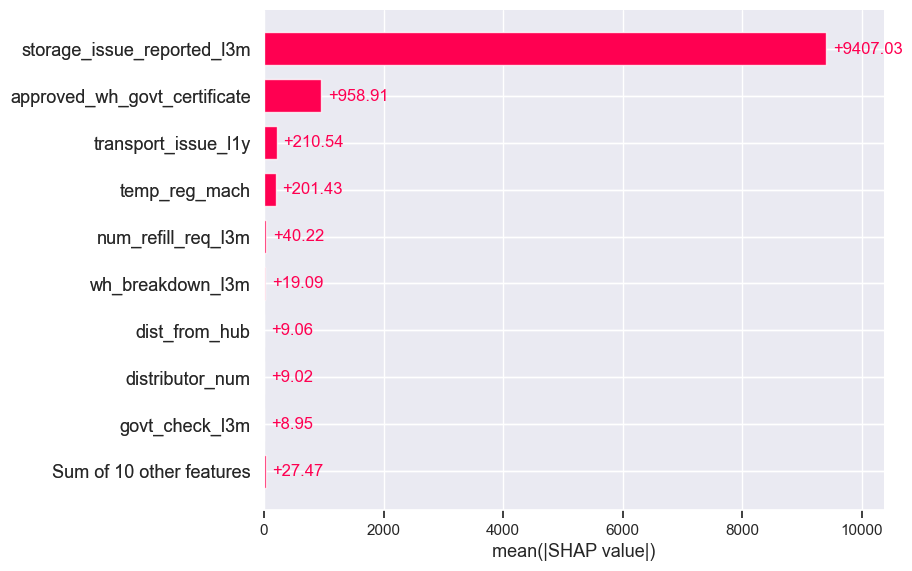

In [80]:
explainer_test_rfg = shap.Explainer(best_model_rfg)
shap_values_test_rfg = explainer_test_rfg(X_test)
shap.plots.bar(shap_values_test_rfg)

# c) XGB Regressor

In [81]:
!pip install xgboost

In [82]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = {
    
    'learning_rate': [0.1], # 0.1, 
    'n_estimators': [100],       # 100,
    'gamma': [0],
    'objective' : ['reg:squarederror'],    
    'max_depth': [5], # -1.0,<0 means no limit   
    'reg_alpha': [0.8],       # 0.0,L1 regularization
    'reg_lambda': [1.2],       # 0.0,L2 regularization
      
    'colsample_bytree' : [1],      #1.0,
    'subsample': [1], # 1.0, also subsample 
    'min_child_weight': [0.001], #0.001, minimum sum of instance weight (hessian) needed in a leaf
  
    }

In [114]:
%%time
mdl = XGBRegressor(random_state = 1)
model_xgb = GridSearchCV(mdl, parameters, n_jobs=-1, 
                   cv=5, 
                   scoring='neg_root_mean_squared_error',
                   verbose=2, refit=True)
model_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[14:16:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "activation", "hidden_layer_sizes", "max_iter", "solver" } are not used.

CPU times: total: 3.33 s
Wall time: 9.63 s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=1, ...),
             n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [200], 'solver': ['lbfgs']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [85]:
print(model_xgb.best_params_,'\n')
print(model_xgb.best_estimator_)

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 0.001, 'n_estimators': 100, 'objective': 'reg:squarederror', 'reg_alpha': 0.8, 'reg_lambda': 1.2, 'subsample': 1} 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0.001, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)


In [86]:
best_model = model_xgb.best_estimator_
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

In [87]:
print('R-Squared (1- SSE/SST) Train data : ',round(r2_score(y_train, train_pred),3))
print('R-Squared (1- SSE/SST) Test data : ',round(r2_score(y_test, test_pred),3))
print('\n')

print('RMSE Train data : ',round(mean_squared_error(y_train, train_pred, squared =False),3))
print('RMSE Test data : ',round(mean_squared_error(y_test, test_pred, squared =False),3))
print('\n')

print('Mean Abs % Error Train data : ',round(mean_absolute_percentage_error(y_train, train_pred)*100,3),"%")
print('Mean Abs % Error Test data : ',round(mean_absolute_percentage_error(y_test,test_pred)*100,3),"%")

R-Squared (1- SSE/SST) Train data :  0.995
R-Squared (1- SSE/SST) Test data :  0.994


RMSE Train data :  852.986
RMSE Test data :  869.539


Mean Abs % Error Train data :  4.063 %
Mean Abs % Error Test data :  4.211 %


### Selecting the Best Columns

In [88]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

print(X_train.shape)

sfs2 = SFS(best_model, k_features=19, forward=True, verbose=2, scoring='r2', n_jobs=-1)
sfs2 = sfs2.fit(X_train, y_train)

df_sfs2 = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
print(display(df_sfs2.sort_values('avg_score', ascending=False)))

(17500, 19)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    2.7s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    4.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    5.0s finished

[2023-03-30 10:26:50] Features: 1/19 -- score: 0.9823468493719434[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    3.9s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    6.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    6.9s finished

[2023-03-30 10:26:58] Features: 2/19 -- score: 0.9920882492636409[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    4.7s remaining:   22.2s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    5.2s remaining:    2.1s
[Parallel

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(4, 5, 9, 14, 15, 16, 17)","[0.9938321805169547, 0.9936902738440438, 0.993...",0.993947,"(num_refill_req_l3m, transport_issue_l1y, floo...",0.000362,0.000282,0.000141
6,"(4, 5, 9, 14, 15, 16)","[0.9938412586150844, 0.9936770334457597, 0.993...",0.993939,"(num_refill_req_l3m, transport_issue_l1y, floo...",0.000338,0.000263,0.000131
10,"(0, 2, 4, 5, 9, 10, 14, 15, 16, 17)","[0.9938485190315096, 0.9936670383921159, 0.993...",0.993937,"(Location_type, zone, num_refill_req_l3m, tran...",0.000324,0.000252,0.000126
8,"(0, 4, 5, 9, 14, 15, 16, 17)","[0.9938526495570335, 0.9936730893449148, 0.993...",0.993936,"(Location_type, num_refill_req_l3m, transport_...",0.000348,0.00027,0.000135
9,"(0, 4, 5, 9, 10, 14, 15, 16, 17)","[0.9938501017428508, 0.9936658452829014, 0.993...",0.993927,"(Location_type, num_refill_req_l3m, transport_...",0.000329,0.000256,0.000128
5,"(4, 5, 14, 15, 16)","[0.9938746791007891, 0.9936641706390715, 0.993...",0.993927,"(num_refill_req_l3m, transport_issue_l1y, stor...",0.000324,0.000252,0.000126
11,"(0, 2, 4, 5, 7, 9, 10, 14, 15, 16, 17)","[0.9938247346445241, 0.993648302484996, 0.9936...",0.993911,"(Location_type, zone, num_refill_req_l3m, tran...",0.000317,0.000247,0.000123
12,"(0, 2, 4, 5, 7, 9, 10, 11, 14, 15, 16, 17)","[0.9938460092446577, 0.9936437718647649, 0.993...",0.993911,"(Location_type, zone, num_refill_req_l3m, tran...",0.000311,0.000242,0.000121
13,"(0, 2, 3, 4, 5, 7, 9, 10, 11, 14, 15, 16, 17)","[0.9938598449819068, 0.9936680382202248, 0.993...",0.9939,"(Location_type, zone, WH_regional_zone, num_re...",0.000342,0.000266,0.000133
14,"(0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 15, 16, 17)","[0.9938234231831755, 0.9936576431454628, 0.993...",0.993878,"(Location_type, zone, WH_regional_zone, num_re...",0.000325,0.000253,0.000126


None


In [137]:
kd = df_sfs2.sort_values('avg_score', ascending=False)
kd.iloc[0:1,3:4].values

array([[('num_refill_req_l3m', 'transport_issue_l1y', 'flood_impacted', 'storage_issue_reported_l3m', 'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m')]],
      dtype=object)

* storage_issue_reported_l3m is the most important with 98%

### Feature Importances by Coefficients

In [89]:
feature_important = best_model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data['score_%'] = round(data['score']/sum(data['score'])*100,4)

print(display(data.head(10)))

,score,score_%
storage_issue_reported_l3m,1.561431e+10,97.9459
approved_wh_govt_certificate,1.298833e+08,0.8147
temp_reg_mach,6.156162e+07,0.3862
transport_issue_l1y,4.289160e+07,0.2691
num_refill_req_l3m,2.802582e+07,0.1758
wh_owner_type,8.229962e+06,0.0516
WH_regional_zone,7.191432e+06,0.0451
wh_breakdown_l3m,6.449126e+06,0.0405
distributor_num,5.769253e+06,0.0362
workers_num,5.058368e+06,0.0317


None


### Feature Importances by SHAP Values

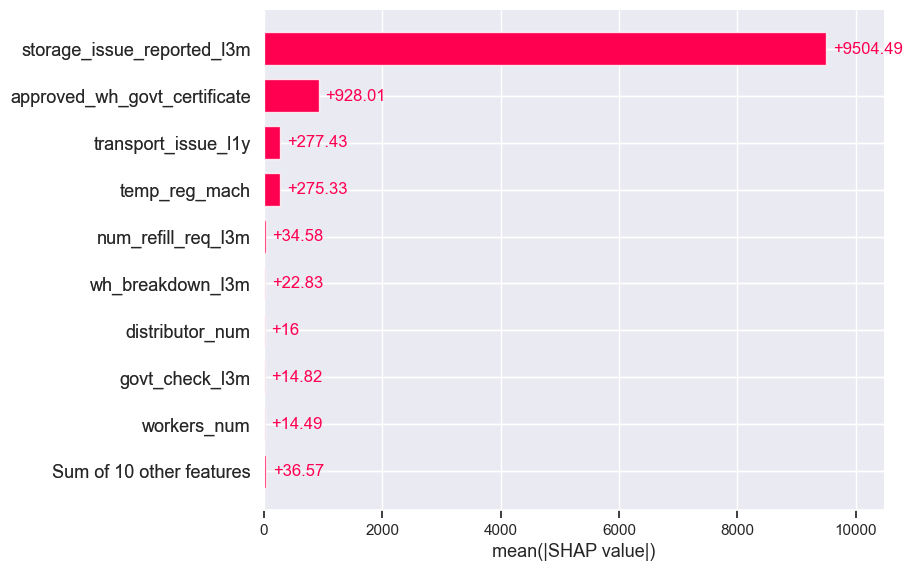

In [90]:
explainer_train_xgb = shap.Explainer(best_model)
shap_values_train_xgb = explainer_train_xgb(X_train)
shap.plots.bar(shap_values_train_xgb)

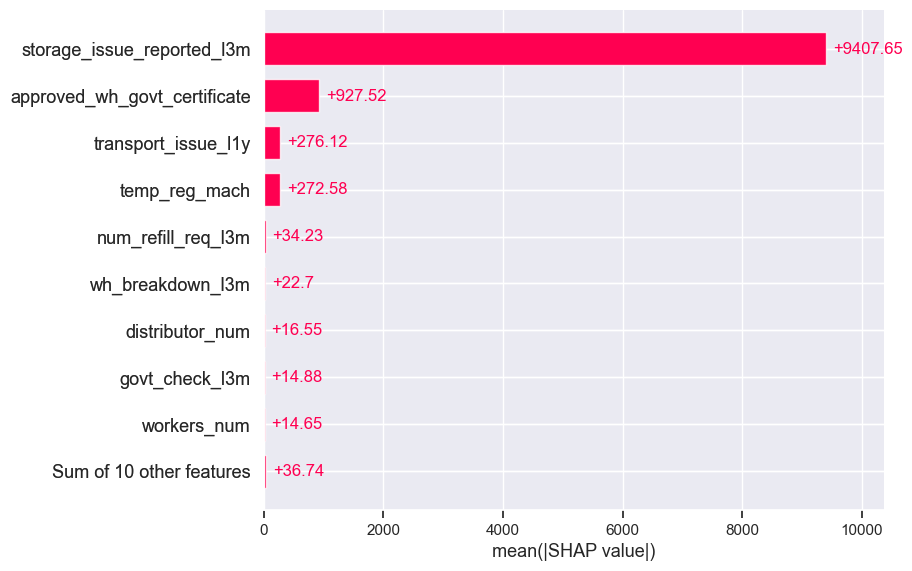

In [91]:
explainer_test_xgb = shap.Explainer(best_model)
shap_values_test_xgb = explainer_train_xgb(X_test)
shap.plots.bar(shap_values_test_xgb)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

,attributes,imp_score,imp_score_%
14,storage_issue_reported_l3m,0.979459,97.9459
16,approved_wh_govt_certificate,0.008147,0.8147
15,temp_reg_mach,0.003862,0.3862
5,transport_issue_l1y,0.002691,0.2691
4,num_refill_req_l3m,0.001758,0.1758
7,wh_owner_type,0.000516,0.0516
3,WH_regional_zone,0.000451,0.0451
17,wh_breakdown_l3m,0.000405,0.0405
8,distributor_num,0.000362,0.0362
13,workers_num,0.000317,0.0317


None


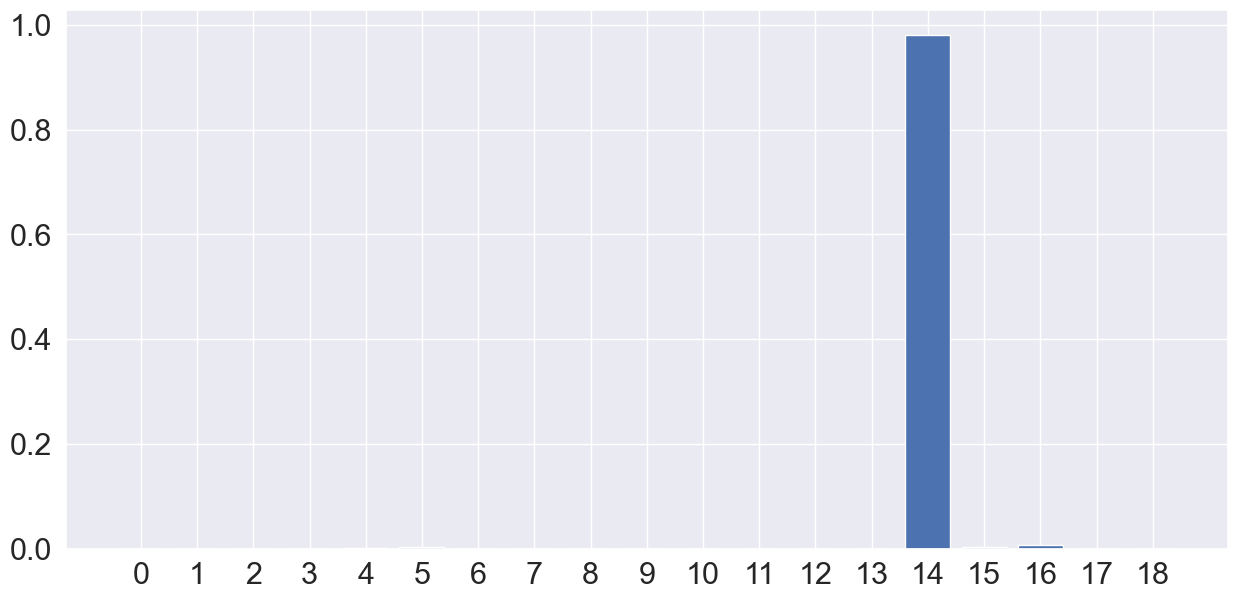

In [92]:
# feature importance
df_feat_imp = pd.DataFrame( {'attributes' : [x for x in X_train.columns],
                             'imp_score'  :list(best_model.feature_importances_)
                            }, 
                             columns =['attributes','imp_score'])
df_feat_imp['imp_score_%'] = round(df_feat_imp['imp_score']*100,4)
print(display(df_feat_imp.sort_values('imp_score', ascending=False)))

# plot
plt.figure(figsize=(15,7))
plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.xticks(range(len(best_model.feature_importances_)))
plt.show()



# d) MLP regressor

In [93]:
from sklearn.neural_network import MLPRegressor

parameters = {
    'hidden_layer_sizes'     :[(50,50,50),(100,100,100),(200,200,200)],
    'activation'             :['identity', 'logistic', 'tanh', 'relu'],
    'solver'                 :['lbfgs','sgd','adam'],
    'tol'                    :[0.1],
    'max_iter'               :[2000],
    'learning_rate_init'     : [0.1]  
    }

In [94]:
parameters = {
    'hidden_layer_sizes'     :[(100,100,100)],    
    'activation'             :['relu'],
    'solver'                 :['lbfgs'],
    'max_iter'               :[200],
    }

In [95]:
%%time
mdl_mlp = MLPRegressor(random_state = 1)
model_mlp = GridSearchCV(mdl_mlp, parameters, n_jobs=-1, 
                   cv=5, 
                   scoring='neg_root_mean_squared_error',
                   verbose=2, refit=True)
model_mlp.fit(X_train_sc, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 4min 56s
Wall time: 3min 16s


GridSearchCV(cv=5, estimator=MLPRegressor(random_state=1), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [200], 'solver': ['lbfgs']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [96]:
print(model_mlp.best_params_,'\n')
print(model_mlp.best_estimator_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'max_iter': 200, 'solver': 'lbfgs'} 

MLPRegressor(hidden_layer_sizes=(100, 100, 100), random_state=1, solver='lbfgs')


In [97]:
best_model_mlp = model_mlp.best_estimator_
train_pred = best_model_mlp.predict(X_train_sc)
test_pred = best_model_mlp.predict(X_test_sc)

In [98]:
print('R-Squared (1- SSE/SST) Train data : ',round(r2_score(y_train, train_pred),3))
print('R-Squared (1- SSE/SST) Test data : ',round(r2_score(y_test, test_pred),3))
print('\n')

print('RMSE Train data : ',round(mean_squared_error(y_train, train_pred, squared =False),3))
print('RMSE Test data : ',round(mean_squared_error(y_test, test_pred, squared =False),3))
print('\n')

print('Mean Abs % Error Train data : ',round(mean_absolute_percentage_error(y_train, train_pred)*100,3),"%")
print('Mean Abs % Error Test data : ',round(mean_absolute_percentage_error(y_test,test_pred)*100,3),"%")

R-Squared (1- SSE/SST) Train data :  0.993
R-Squared (1- SSE/SST) Test data :  0.993


RMSE Train data :  941.458
RMSE Test data :  970.665


Mean Abs % Error Train data :  4.684 %
Mean Abs % Error Test data :  4.868 %


### Feature Importances by SHAP Values 

Permutation explainer: 17501it [37:08,  7.83it/s]                                                                      


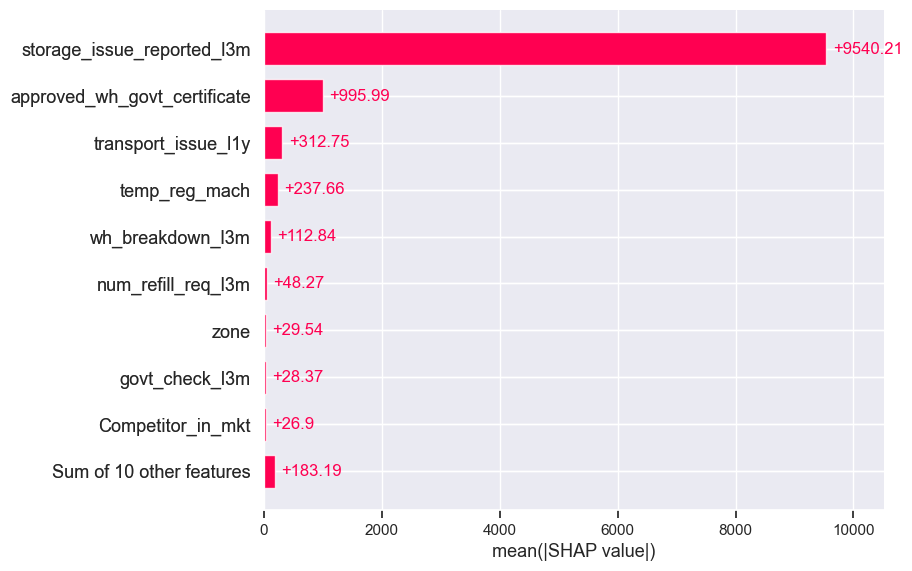

In [99]:
# Fits the explainer
explainer_train_mlp = shap.Explainer(best_model_mlp.predict, X_train_sc)

# Calculates the SHAP values - It takes some time
shap_values_train_mlp = explainer_train_mlp(X_train_sc)
shap.plots.bar(shap_values_train_mlp)

Permutation explainer: 7501it [21:00,  5.90it/s]                                                                       


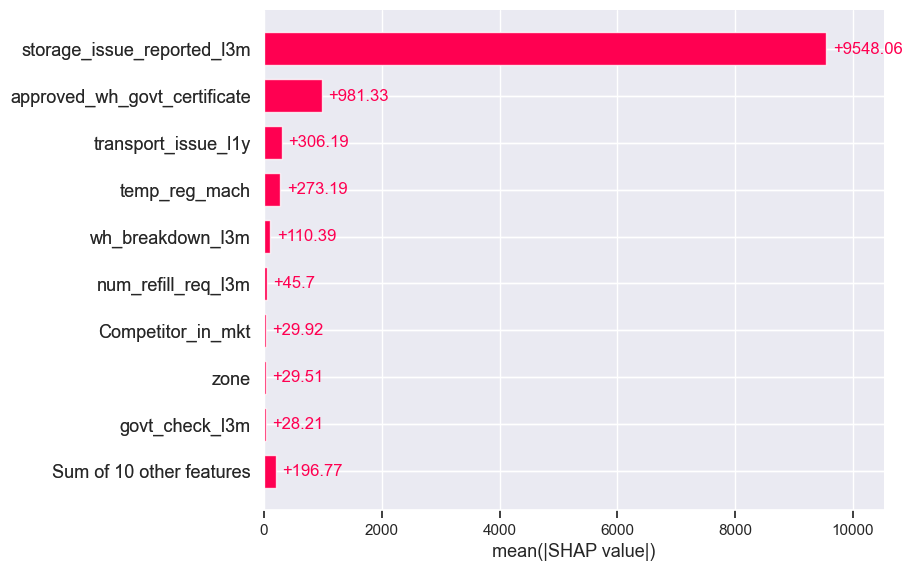

In [100]:
# Fits the explainer
explainer_test_mlp = shap.Explainer(best_model_mlp.predict, X_test_sc)

# Calculates the SHAP values - It takes some time
shap_values_test_mlp = explainer_test_mlp(X_test_sc)
shap.plots.bar(shap_values_test_mlp)